In [4]:
#!pip install opencv-python-headless

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 23.7 MB/s eta 0:00:0000:0100:01


In [10]:
#!pip install pillow

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import torch
import os
from PIL import Image
import numpy as np

In [2]:
def cargar_imagenes(ruta, tamaño_imagen, guardar_archivos=False):
    X = []
    y = []
    
    # Mapeo de etiquetas de texto a números
    etiqueta_a_numero = {"Fuga": 0, "Ataque": 1, "Depresión": 2, "Presión": 3}
    
    # Itera sobre las carpetas AG
    for carpeta_ag in os.listdir(ruta):
        carpeta_ag_ruta = os.path.join(ruta, carpeta_ag)
        
        # Verifica si es una carpeta AG válida
        if os.path.isdir(carpeta_ag_ruta):
            # Itera sobre las subcarpetas dentro de la carpeta AG (Pala A, Pala B, ...)
            for subcarpeta_pala in os.listdir(carpeta_ag_ruta):
                subcarpeta_pala_ruta = os.path.join(carpeta_ag_ruta, subcarpeta_pala)
                
                # Verifica si es una subcarpeta de Pala válida
                if os.path.isdir(subcarpeta_pala_ruta):
                    # Itera sobre las subcarpetas dentro de la subcarpeta de Pala (Fuga, Ataque, ...)
                    for subcarpeta_accion in os.listdir(subcarpeta_pala_ruta):
                        subcarpeta_accion_ruta = os.path.join(subcarpeta_pala_ruta, subcarpeta_accion)
                        
                        # Verifica si es una subcarpeta de Acción válida
                        if os.path.isdir(subcarpeta_accion_ruta):
                            # Itera sobre los archivos dentro de la subcarpeta de Acción
                            for archivo in os.listdir(subcarpeta_accion_ruta):
                                archivo_ruta = os.path.join(subcarpeta_accion_ruta, archivo)
                                
                                # Abre la imagen con PIL
                                imagen = Image.open(archivo_ruta)
                                
                                # Redimensiona la imagen manteniendo la proporción
                                imagen = imagen.resize(tamaño_imagen, Image.ANTIALIAS)
                                
                                # Convierte la imagen a formato JPEG con compresión ajustada
                                imagen_comprimida = Image.new("RGB", tamaño_imagen)
                                imagen_comprimida.paste(imagen)
                                
                                # Convierte la imagen a tensor de PyTorch
                                imagen_tensor = torch.tensor(np.array(imagen_comprimida)).permute(2, 0, 1).float() / 255.0
                                
                                # Almacena la imagen en la lista X
                                X.append(imagen_tensor)
                                
                                # Agrega la etiqueta a la lista y
                                y.append(etiqueta_a_numero[subcarpeta_accion])  # Convertir etiqueta a número
            
    X = torch.stack(X)
    y = torch.tensor(y)
    
    # Guardar los archivos si se especifica
    if guardar_archivos:
        torch.save(X, "dataset_X.pt")
        torch.save(y, "dataset_y.pt")
        print("Dataset guardado correctamente.")
    
    return X, y

In [3]:
# Especifica la ruta de la carpeta que contiene las carpetas AG
ruta_dataset = "./data"

# Especifica el tamaño de imagen deseado
tamaño_imagen = (64, 64)  # Por ejemplo, 128x128 píxeles

# Carga las imágenes y etiquetas desde las carpetas
X, y = cargar_imagenes(ruta_dataset, tamaño_imagen, guardar_archivos=True)

# Verifica las formas de los datos cargados
print("Forma de las imágenes cargadas:", X.shape)
print("Forma de las etiquetas cargadas:", y.shape)


/tmp/ipykernel_40036/2457928046.py:34: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen = imagen.resize(tamaño_imagen, Image.ANTIALIAS)


Dataset guardado correctamente.
Forma de las imágenes cargadas: torch.Size([9156, 3, 64, 64])
Forma de las etiquetas cargadas: torch.Size([9156])


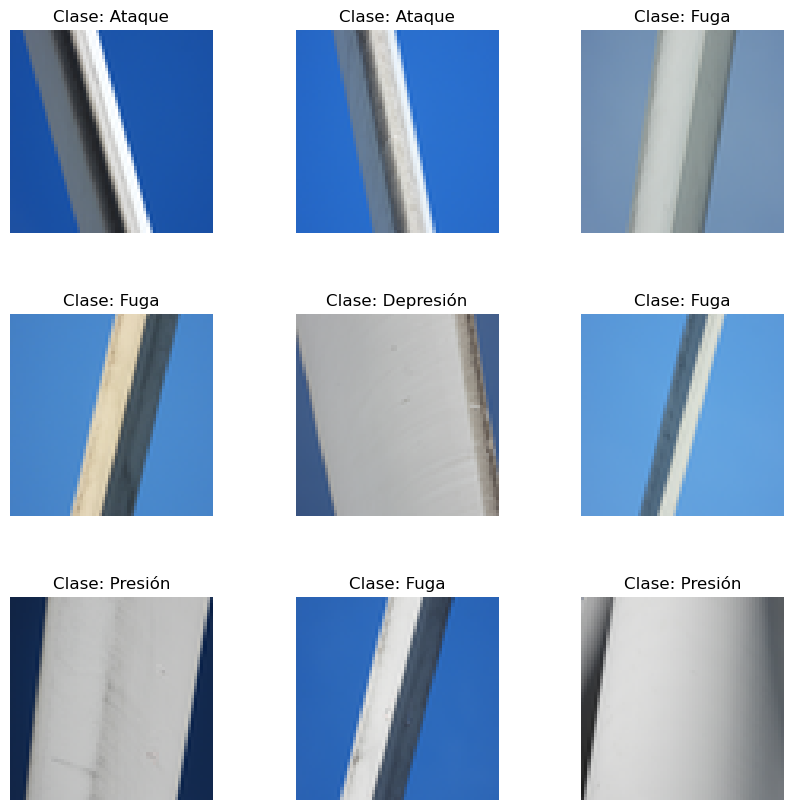

In [4]:
import matplotlib.pyplot as plt

def mostrar_muestra_imagenes(X, y, clases, muestra=9):
    # Obtener índices aleatorios para la muestra
    indices_muestra = torch.randperm(len(X))[:muestra]
    
    # Configurar el subplot
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, indice in enumerate(indices_muestra):
        # Obtener la imagen y la etiqueta correspondiente
        imagen = X[indice]
        etiqueta = y[indice].item()
        
        # Convertir la imagen a numpy y transponerla para que sea compatible con imshow
        imagen_numpy = imagen.permute(1, 2, 0).numpy()
        
        # Obtener la clase de la etiqueta
        clase = clases[etiqueta]
        
        # Mostrar la imagen en el subplot
        axs[i // 3, i % 3].imshow(imagen_numpy)
        axs[i // 3, i % 3].set_title(f"Clase: {clase}")
        axs[i // 3, i % 3].axis("off")
    
    plt.show()

# Define las clases
clases = ["Fuga", "Ataque", "Depresión", "Presión"]

# Muestra una muestra de imágenes con sus etiquetas
mostrar_muestra_imagenes(X, y, clases)
